<a href="https://colab.research.google.com/github/shakyarujan/Deep-Learning-with-PyTorch/blob/master/Multi_Layer_Perceptron%2C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import optim

In [83]:
num_workers = 0 
batch_size = 50
valid_size = 0.2

transform = transforms.ToTensor()

train_data = datasets.MNIST('MNIST_Traindata/', train=True, download=True, transform=transform)
test_data = datasets.MNIST('MNIST_Testdata/', train=False, download=True, transform=transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
print(split)
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


12000


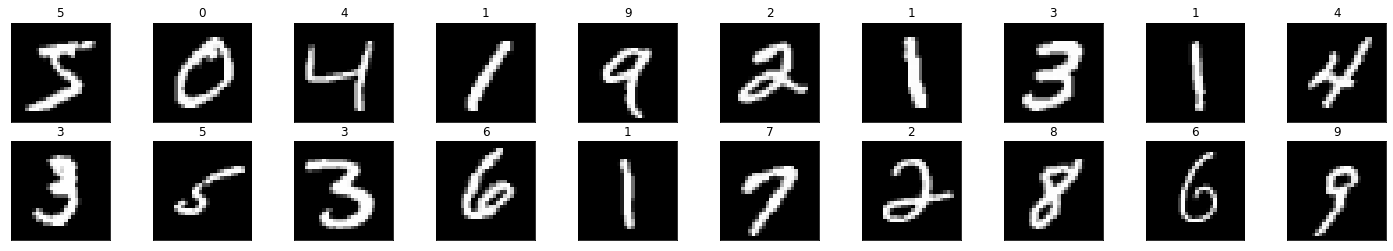

In [8]:
images, labels = next(iter(train_loader))
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for i in np.arange(20):
  image = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
  image.imshow(np.squeeze(images[i]), cmap='gray')
  image.set_title(str(labels[i].item()))

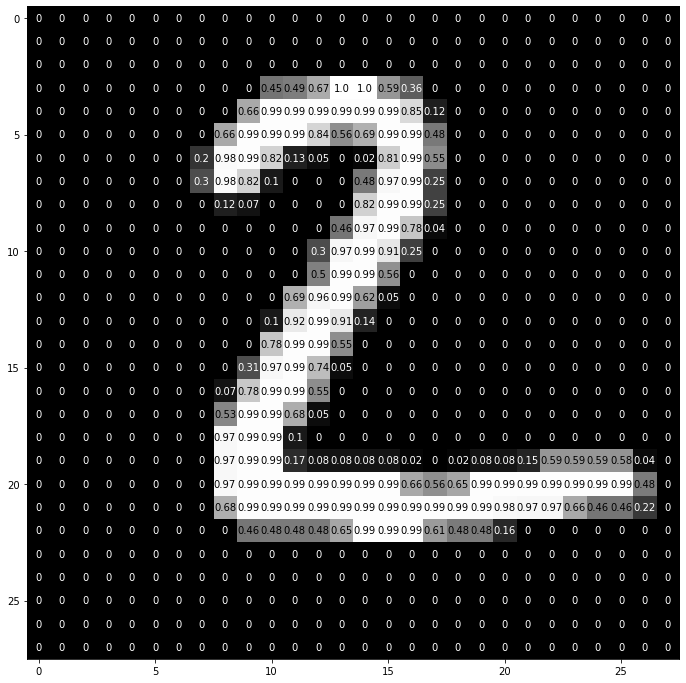

In [78]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [84]:
# define the NN architecture 
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # number of hidden nodes in each layer (512)
    hidden_1 = 512
    hidden_2 = 512
    # linear layer (784 -> hidden_1)
    self.fc1 = nn.Linear(28 * 28, hidden_1)
    # linear layer (n_hidden -> hidden_2)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    # linear layer (n_hidden -> 10)
    self.fc3 = nn.Linear(hidden_2, 10)
    # dropout layer (p=0.2)
    # dropout prevents overfitting of data
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    # flatten image input
    x = x.view(-1, 28 * 28)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.dropout(x)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc2(x))
    # add dropout layer
    x = self.dropout(x)
    # add output layer
    x = self.fc3(x)
    return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [0]:
# specify Loss Function
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [89]:
n_epochs = 40

valid_loss_min = np.Inf # set initial "min" to infinity

model.train()

for epoch in range(n_epochs):
  train_loss = 0.0
  valid_loss = 0.0

  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()*data.size(0)

  for data, target in valid_loader:
    output = model(data)
    loss = criterion(output, target)
    valid_loss += loss.item()*data.size(0)
  
  train_loss = train_loss/len(train_loader.dataset)
  valid_loss = valid_loss/len(valid_loader.dataset)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))
  
  if valid_loss <= valid_loss_min:
    print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
    torch.save(model.state_dict(), 'model.pt')
    valid_loss_min = valid_loss



Epoch: 1 	Training Loss: 0.066282 	Validatoion Loss: 0.024717
Validation loss decreased (inf --> 0.024717). Saving model ...
Epoch: 2 	Training Loss: 0.065562 	Validatoion Loss: 0.024702
Validation loss decreased (0.024717 --> 0.024702). Saving model ...
Epoch: 3 	Training Loss: 0.062674 	Validatoion Loss: 0.024615
Validation loss decreased (0.024702 --> 0.024615). Saving model ...
Epoch: 4 	Training Loss: 0.061618 	Validatoion Loss: 0.024129
Validation loss decreased (0.024615 --> 0.024129). Saving model ...
Epoch: 5 	Training Loss: 0.059698 	Validatoion Loss: 0.022995
Validation loss decreased (0.024129 --> 0.022995). Saving model ...
Epoch: 6 	Training Loss: 0.057703 	Validatoion Loss: 0.023380
Epoch: 7 	Training Loss: 0.056005 	Validatoion Loss: 0.023762
Epoch: 8 	Training Loss: 0.054299 	Validatoion Loss: 0.022474
Validation loss decreased (0.022995 --> 0.022474). Saving model ...
Epoch: 9 	Training Loss: 0.053097 	Validatoion Loss: 0.022437
Validation loss decreased (0.022474 -->

In [90]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [91]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
# model.eval() will set all the layers in your model to evaluation mode.

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.064446

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 97% (1010/1032)
Test Accuracy of     3: 98% (990/1010)
Test Accuracy of     4: 97% (961/982)
Test Accuracy of     5: 97% (867/892)
Test Accuracy of     6: 98% (944/958)
Test Accuracy of     7: 97% (1005/1028)
Test Accuracy of     8: 96% (944/974)
Test Accuracy of     9: 97% (983/1009)

Test Accuracy (Overall): 98% (9802/10000)


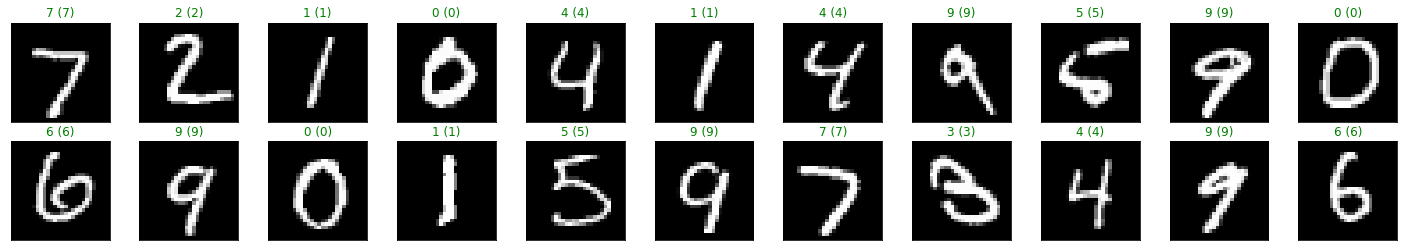

In [77]:
images, labels = next(iter(test_loader))

output = model(images)
#convert output prob to predicted class
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for i in np.arange(22):
  figure = fig.add_subplot(2, 22/2, i+1, xticks=[], yticks=[])
  figure.imshow(np.squeeze(images[i]), cmap='gray')
  figure.set_title("{} ({})".format(str(preds[i].item()), str(labels[i].item())), color=("green" if preds[i] == labels[i] else "red"))